In [110]:
import numpy as np
import matplotlib.pyplot as plt

#Inverted-Pendulum

##Implementation of the pendulum equation and rk4 step method

In [111]:
def pendulum_dynamics(x, u, params):  # Compute the function f(x,t) such that theta'' = f(x,t)
  theta, omega = x
  m, l, g = params["m"], params["l"], params["g"]

  d_theta = omega
  d_omega = (g/l) * np.sin(theta) + u/(m * l**2)

  return np.array([d_theta, d_omega])

def rk4_step(f, x, u, dt, params):  # Compute the position after a short time dt based on the pervious position using rk4 method
  k1 = f(x, u, params)
  k2 = f(x + 0.5 * dt * k1, u, params)
  k3 = f(x + 0.5 * dt * k2, u, params)
  k4 = f(x + dt * k3, u, params)

  return x + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)

###Test

In [112]:
params = {
    "g": 9.81,   # gravity (m/s^2)
    "l": 1.0,    # lenght (m)
    "m": 1.0     # mass (kg)
}

x0 = np.array([0.1,0.0])
x1 = rk4_step(pendulum_dynamics, x0, u=0.0, dt=0.01, params=params)
print(x1)

[0.10004897 0.00979525]


##Simulation loop

In [113]:
def trajectory_simulation(x0, u_control, dt, T, params):
  N = int(T/dt)
  x = np.zeros((N+1, 2))
  x[0] = x0
  for t in range(N):
    u = u_control(t * dt, x[t])
    x[t+1] = rk4_step(pendulum_dynamics, x[t], u, dt, params)
  return x

def zero_control(t,x):
  return 0

###Test

Text(0.5, 1.0, 'Evolution of the angular velocity')

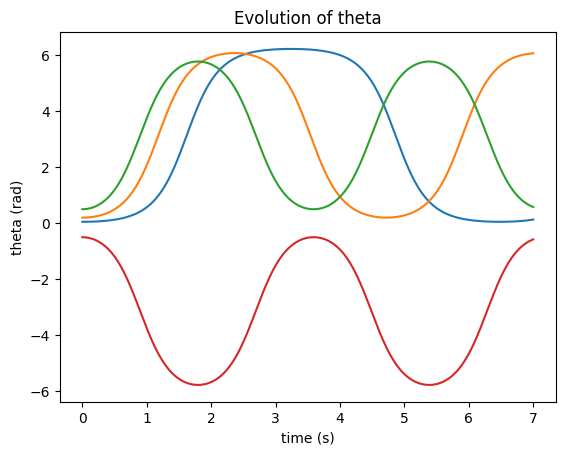

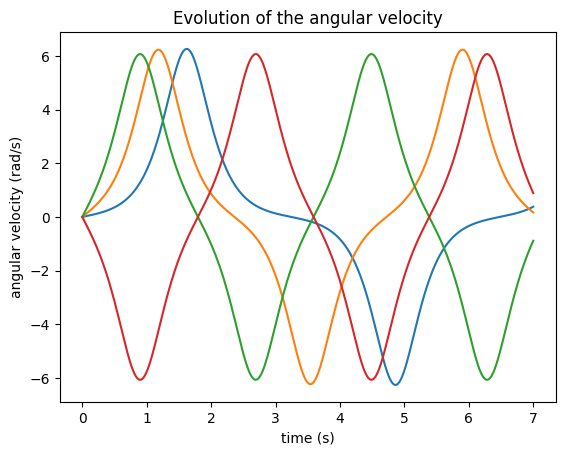

In [114]:
x0_list = [
    np.array([0.05, 0.0]),
    np.array([0.2, 0.0]),
    np.array([0.5, 0.0]),
    np.array([-0.5,0.0])
]
t = np.arange(start=0.0, stop=7.01, step=0.01)

for x0 in x0_list:
    traj = trajectory_simulation(x0, zero_control, T=7.0, dt=0.01, params=params)
    plt.plot(t,traj[:,0])
plt.xlabel("time (s)")
plt.ylabel("theta (rad)")
plt.title("Evolution of theta")

plt.figure()
for x0 in x0_list:
  traj = trajectory_simulation(x0, zero_control, T=7.0, dt=0.01, params=params)
  plt.plot(t,traj[:,1])
plt.xlabel("time (s)")
plt.ylabel("angular velocity (rad/s)")
plt.title("Evolution of the angular velocity")

Text(0.5, 1.0, 'Phase portrait')

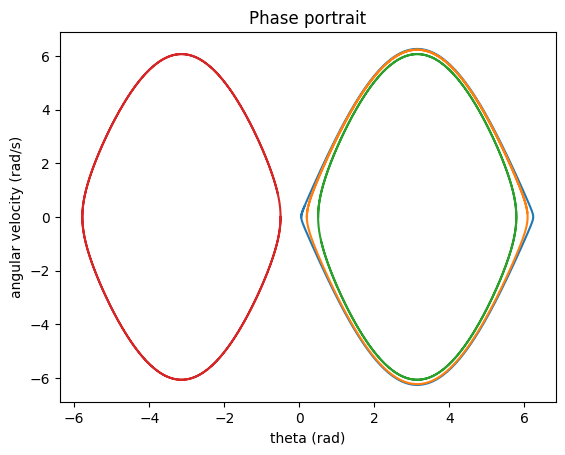

In [115]:
plt.figure()
for x0 in x0_list:
  traj = trajectory_simulation(x0, zero_control, T=7.0, dt=0.01, params=params)
  plt.plot(traj[:,0],traj[:,1])
plt.xlabel("theta (rad)")
plt.ylabel("angular velocity (rad/s)")
plt.title("Phase portrait")

##Verification throught mechanical energy

In [116]:
def mechanical_energy(x, params):    # Verification that Em is roughly constant
  m, l, g = params["m"], params["l"], params["g"]
  theta = x[:,0]
  omega = x[:,1]

  E = 0.5 * m * l**2 * omega**2 + m * g * l * np.cos(theta)
  return E

9.79774005447462 [0.05 0.  ]
9.61445312862258 [0.2 0. ]
8.609084932144556 [0.5 0. ]
8.609084932144556 [-0.5  0. ]


Text(0.5, 1.0, 'Evolution of the mechanical energy')

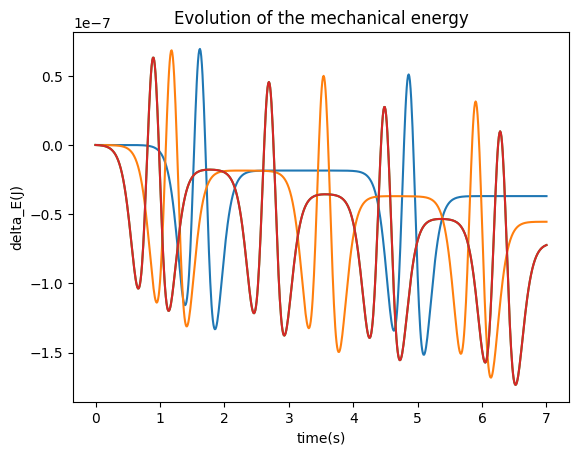

In [117]:
for x0 in x0_list:
    E = mechanical_energy(trajectory_simulation(x0, zero_control, T=7.0, dt=0.01, params=params), params)
    plt.plot(t,E - E[0])
    print(E[0], x0)
plt.xlabel("time(s)")
plt.ylabel("delta_E(J)")
plt.title("Evolution of the mechanical energy")